In [79]:
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from src.exception import CustomException

In [61]:
df = pd.read_csv("../artifacts/data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [62]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [63]:
df.shape

(375, 6)

In [64]:
df.dropna(inplace=True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [65]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [66]:
df.drop(['Age','Gender'],axis=1,inplace=True)
df.head()

,Education Level,Job Title,Years of Experience,Salary
0,Bachelor's,Software Engineer,5.0,90000.0
1,Master's,Data Analyst,3.0,65000.0
2,PhD,Senior Manager,15.0,150000.0
3,Bachelor's,Sales Associate,7.0,60000.0
4,Master's,Director,20.0,200000.0


In [67]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [68]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [69]:
count = 0
for arr in df['Job Title']:
    count = count + 1
print(count)

373


In [70]:
X = df.drop(columns=['Salary'],axis=1)
print(X)

    Education Level                      Job Title  Years of Experience
0        Bachelor's              Software Engineer                  5.0
1          Master's                   Data Analyst                  3.0
2               PhD                 Senior Manager                 15.0
3        Bachelor's                Sales Associate                  7.0
4          Master's                       Director                 20.0
..              ...                            ...                  ...
370      Bachelor's       Senior Marketing Analyst                  8.0
371        Master's         Director of Operations                 19.0
372      Bachelor's         Junior Project Manager                  2.0
373      Bachelor's  Senior Operations Coordinator                  7.0
374             PhD        Senior Business Analyst                 15.0

[373 rows x 3 columns]


In [71]:
def Data_Preprocessing():
    try:
       num_features = X.select_dtypes(exclude="object").columns
       cat_features = X.select_dtypes(include="object").columns

       preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", OneHotEncoder(), cat_features),
                ("StandardScaler", StandardScaler(), num_features),    
            ]
        )
        
       return preprocessor
    except Exception as e:
        raise CustomException(e,sys)

In [73]:
preprocessor = Data_Preprocessing()
X = preprocessor.fit_transform(X)

In [74]:
X.shape

(373, 178)

In [76]:
y = df['Salary']
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((298, 178), (75, 178))

In [80]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6539.6056
- Mean Absolute Error: 4149.9926
- R2 Score: 0.9814
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18468.4182
- Mean Absolute Error: 11942.6166
- R2 Score: 0.8577


Lasso
Model performance for Training set
- Root Mean Squared Error: 6551.8534
- Mean Absolute Error: 4224.8995
- R2 Score: 0.9813
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18069.7734
- Mean Absolute Error: 11554.2986
- R2 Score: 0.8638


Ridge
Model performance for Training set
- Root Mean Squared Error: 9838.9051
- Mean Absolute Error: 7027.9650
- R2 Score: 0.9579
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14679.2620
- Mean Absolute Error: 9623.0084
- R2 Score: 0.9101


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 12815.1007
- Mean Absolute Error: 8834

In [82]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.910126
1,Lasso,0.863814
3,K-Neighbors Regressor,0.859686
0,Linear Regression,0.857739
5,Random Forest Regressor,0.855666
4,Decision Tree,0.826492
6,AdaBoost Regressor,0.815701


In [83]:
lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.01


Text(0, 0.5, 'Predicted')

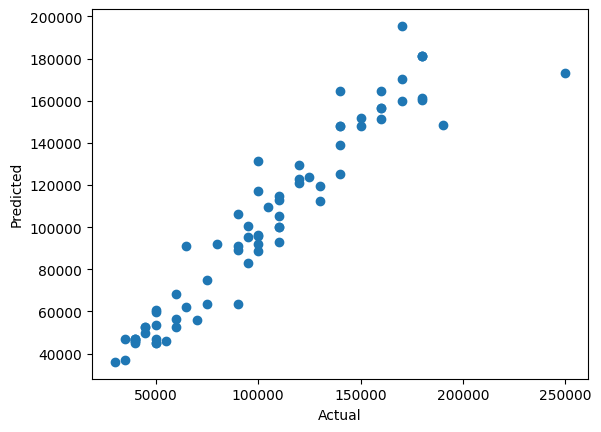

In [84]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

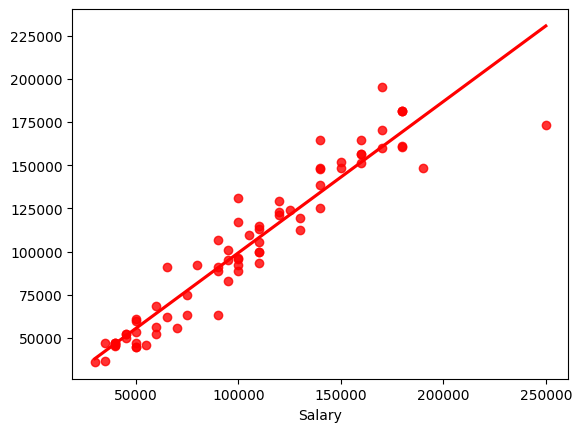

In [85]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [86]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
329,180000.0,181225.698535,-1225.698535
33,65000.0,90934.155163,-25934.155163
15,125000.0,123857.167159,1142.832841
316,80000.0,92170.003009,-12170.003009
57,140000.0,148133.109870,-8133.109870
...,...,...,...
94,75000.0,75083.844568,-83.844568
196,90000.0,106426.723937,-16426.723937
313,60000.0,56234.707584,3765.292416
294,140000.0,125386.624831,14613.375169


In [89]:
df

,Education Level,Job Title,Years of Experience,Salary
0,Bachelor's,Software Engineer,5.0,90000.0
1,Master's,Data Analyst,3.0,65000.0
2,PhD,Senior Manager,15.0,150000.0
3,Bachelor's,Sales Associate,7.0,60000.0
4,Master's,Director,20.0,200000.0
...,...,...,...,...
370,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,Master's,Director of Operations,19.0,170000.0
372,Bachelor's,Junior Project Manager,2.0,40000.0
373,Bachelor's,Senior Operations Coordinator,7.0,90000.0
